# **Read data process**

In [1]:
import pandas as pd

In [2]:
# Read data from train.csv
train_data = pd.read_csv('train.csv')
train_data = train_data.drop(columns=['split'])
train_data = train_data.drop(columns=['Unnamed: 0'])
train_data = train_data.drop(columns=['Message ID'])

# Display 5 first rows of the dataframe
train_data.head(5)

,Subject,Message,Spam/Ham
0,christmas tree farm pictures,NaN,ham
1,"vastar resources , inc .","gary , production from the high island larger ...",ham
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham
3,re : issue,fyi - see note below - already done .\nstella\...,ham
4,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham


In [3]:
# Read data from val.csv
val_data = pd.read_csv('val.csv')
val_data = val_data.drop(columns=['split'])
val_data = val_data.drop(columns=['Unnamed: 0'])
val_data = val_data.drop(columns=['Message ID'])

# Display 5 first rows of the dataframe
val_data.head(5)

,Subject,Message,Spam/Ham
0,miscellaneous,- - - - - - - - - - - - - - - - - - - - - - fo...,ham
1,re : purge of old contract _ event _ status,fyi - what do you all think ?\n- - - - - - - -...,ham
2,valero 8018 and 1394,it is my understanding the outages valero incu...,ham
3,01 / 00 natural gas nomination,enron methanol company nominates the following...,ham
4,re : misc . questions,- - - - - - - - - - - - - - - - - - - - - - fo...,ham


# **Prepare data for training**

In [4]:
train_data['Subject'] = train_data['Subject'].fillna('')
train_data['Message'] = train_data['Message'].fillna('')

val_data['Subject'] = val_data['Subject'].fillna('')
val_data['Message'] = val_data['Message'].fillna('')

# Combine Subject and Message columns
train_data['text'] = train_data['Subject'] + ' ' + train_data['Message']
val_data['text'] = val_data['Subject'] + ' ' + val_data['Message']

In [5]:
train_data.head(5)

,Subject,Message,Spam/Ham,text
0,christmas tree farm pictures,,ham,christmas tree farm pictures
1,"vastar resources , inc .","gary , production from the high island larger ...",ham,"vastar resources , inc . gary , production fro..."
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,calpine daily gas nomination - calpine daily g...
3,re : issue,fyi - see note below - already done .\nstella\...,ham,re : issue fyi - see note below - already done...
4,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,"mcmullen gas for 11 / 99 jackie ,\nsince the i..."


In [6]:
val_data.head(5)

,Subject,Message,Spam/Ham,text
0,miscellaneous,- - - - - - - - - - - - - - - - - - - - - - fo...,ham,miscellaneous - - - - - - - - - - - - - - - - ...
1,re : purge of old contract _ event _ status,fyi - what do you all think ?\n- - - - - - - -...,ham,re : purge of old contract _ event _ status fy...
2,valero 8018 and 1394,it is my understanding the outages valero incu...,ham,valero 8018 and 1394 it is my understanding th...
3,01 / 00 natural gas nomination,enron methanol company nominates the following...,ham,01 / 00 natural gas nomination enron methanol ...
4,re : misc . questions,- - - - - - - - - - - - - - - - - - - - - - fo...,ham,re : misc . questions - - - - - - - - - - - - ...


## Visualize

In [7]:
from collections import Counter

train_data['text'] = train_data['Subject'] + ' ' + train_data['Message']

ham_words = ' '.join(list(train_data[train_data['Spam/Ham'] == 'ham']['text'].astype(str)))
spam_words = ' '.join(list(train_data[train_data['Spam/Ham'] == 'spam']['text'].astype(str)))

ham_words = ham_words.split()
spam_words = spam_words.split() 

ham_word_freq = Counter(ham_words)
spam_word_freq = Counter(spam_words)


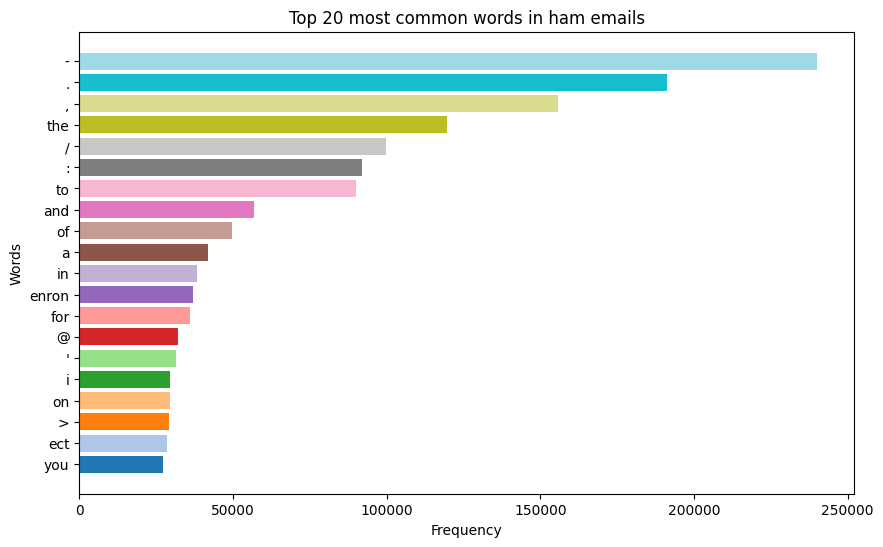

In [8]:
# Visualize the most common words in ham emails
import matplotlib.pyplot as plt
import numpy as np

ham_word_freq_df = pd.DataFrame(ham_word_freq.most_common(20), columns=['word', 'frequency'])
ham_word_freq_df = ham_word_freq_df.sort_values(by='frequency')

colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(10, 6))
plt.barh(ham_word_freq_df['word'], ham_word_freq_df['frequency'], color=colors)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most common words in ham emails')
plt.show()

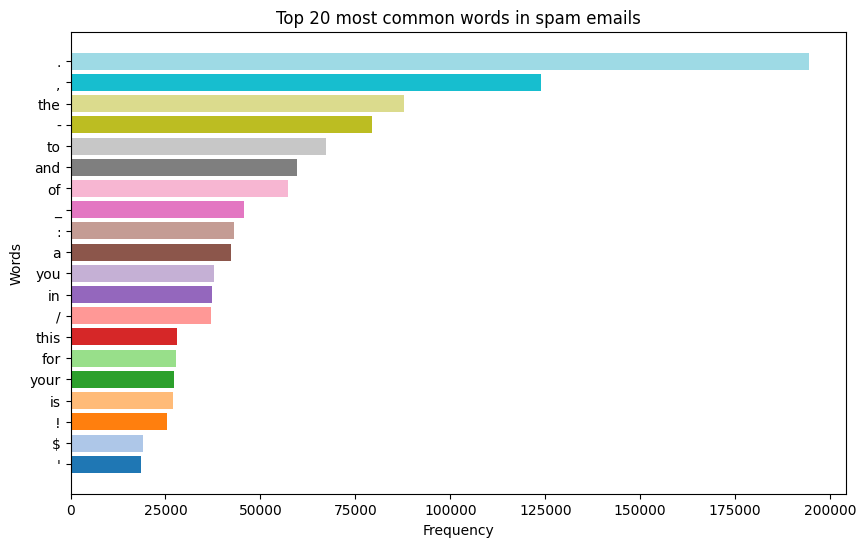

In [9]:
# Visualize the most common words in spam emails

spam_word_freq_df = pd.DataFrame(spam_word_freq.most_common(20), columns=['word', 'frequency'])
spam_word_freq_df = spam_word_freq_df.sort_values(by='frequency')

colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(10, 6))
plt.barh(spam_word_freq_df['word'], spam_word_freq_df['frequency'], color=colors)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most common words in spam emails')
plt.show()

## Vectorize

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text data
vectorizer = CountVectorizer()  
X_train = vectorizer.fit_transform(train_data['text'])  # Fit on train data
X_val = vectorizer.transform(val_data['text'])          # Transform validation data

In [11]:
# Label data
y_train = train_data['Spam/Ham'].map({'spam': 1, 'ham': 0})
y_val = val_data['Spam/Ham'].map({'spam': 1, 'ham': 0})

# **Training**

## Multimonial Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB

mul_NB = MultinomialNB()
mul_NB.fit(X_train, y_train)

MultinomialNB()

# **Predict**

## Multimonial Naive Bayes

In [13]:
y_pred = mul_NB.predict(X_val)

# **Evaluate**

## Multimonial Naive Bayes

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1: {f1:.4f}')

Accuracy: 0.9890
Recall: 0.9904
Precision: 0.9879
F1: 0.9891


# **Test**

In [15]:
test_data = pd.read_csv('test.csv')

test_data.drop(columns=['Date'], inplace=True)
test_data.drop(columns=['Message ID'], inplace=True)

test_data.head(5)

,Subject,Message,Spam/Ham
0,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham
1,re : entex transistion,thanks so much for the memo . i would like to ...,ham
2,ua 4 - meter 1441 for 11 / 97 - falfurrias,daren - i need your help in resolving this iss...,ham
3,january production estimate,daren / carlos :\ni did not receive any more c...,ham
4,re : pennzoil avails,- - - - - - - - - - - - - - - - - - - - - - fo...,ham


In [16]:
test_data['Subject'] = test_data['Subject'].fillna('')
test_data['Message'] = test_data['Message'].fillna('')

test_data['text'] = test_data['Subject'] + ' ' + test_data['Message']

In [17]:
X_test = vectorizer.transform(test_data['text'])
y_test = test_data['Spam/Ham'].map({'spam': 1, 'ham': 0})

In [18]:
test_pred = mul_NB.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1: {f1:.4f}')


Accuracy: 0.9901
Recall: 0.9909
Precision: 0.9903
F1: 0.9906
